In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv

In [2]:
torch.cuda.is_available()

True

In [31]:
torch.cuda.set_device(0)

In [95]:
A = torch.tensor([[1,2.0,3,4],[5,6,7,8]])

In [63]:
A.half()

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]], dtype=torch.float16, grad_fn=<CopyBackwards>)

In [64]:
A*3

tensor([[ 3.,  6.,  9., 12.],
        [15., 18., 21., 24.]], grad_fn=<MulBackward0>)

In [12]:
A.half().dtype

torch.int64

In [30]:
A.device

device(type='cuda', index=1)

In [29]:
A=A.to('cuda')

In [26]:
B = torch.rand(5,5)

In [27]:
B.to(A.device)

tensor([[0.5360, 0.7148, 0.6168, 0.2548, 0.7614],
        [0.9242, 0.7014, 0.9903, 0.1989, 0.7481],
        [0.5200, 0.4140, 0.0723, 0.5994, 0.2529],
        [0.1256, 0.6151, 0.6006, 0.4639, 0.0797],
        [0.9579, 0.4013, 0.7970, 0.2281, 0.3883]])

In [20]:
A.device

device(type='cuda', index=0)

In [39]:
A.size()

torch.Size([2, 4])

In [44]:
B=torch.rand(4,3,2)

In [45]:
B

tensor([[[0.3368, 0.9951],
         [0.5035, 0.8944],
         [0.7409, 0.3663]],

        [[0.8847, 0.6203],
         [0.8793, 0.3631],
         [0.7439, 0.8390]],

        [[0.9984, 0.3784],
         [0.3253, 0.9986],
         [0.2120, 0.6944]],

        [[0.6695, 0.0986],
         [0.5982, 0.6389],
         [0.6690, 0.2256]]])

In [46]:
def torchimg2numpy(t):
    return np.transpose(t.detach().cpu().numpy(),(1,2,0))

def show_tensor_as_image(tensor, ncols=5, figsize=10, title = ""):
    plt.figure(figsize=(figsize,figsize))
    plt.axis("off")
    plt.title(title)
    plt.imshow(np.transpose(tv.utils.make_grid(tensor.detach().cpu()[:ncols*ncols], nrow=ncols, padding=2, normalize=True).cpu(),(1,2,0)))

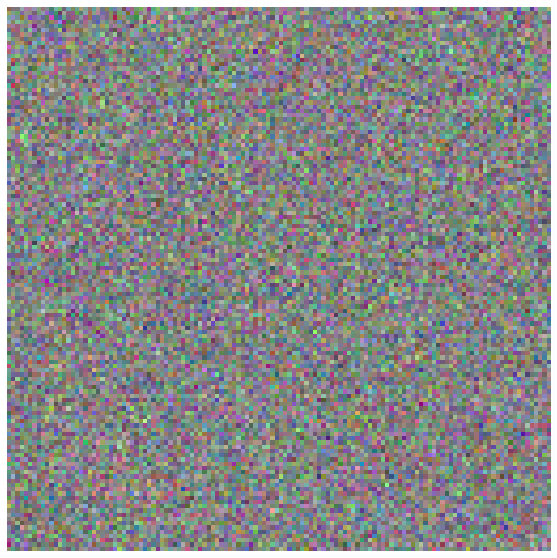

In [50]:
show_tensor_as_image(torch.randn(3,128,128))

`cat`, `stack`, `repeat`

In [52]:
A

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [51]:
torch.cat((A,A),dim=1)

tensor([[1., 2., 3., 4., 1., 2., 3., 4.],
        [5., 6., 7., 8., 5., 6., 7., 8.]])

In [53]:
torch.cat((A,A),dim=0)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.],
        [1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [56]:
torch.stack((A,A,A))

tensor([[[1., 2., 3., 4.],
         [5., 6., 7., 8.]],

        [[1., 2., 3., 4.],
         [5., 6., 7., 8.]],

        [[1., 2., 3., 4.],
         [5., 6., 7., 8.]]])

In [58]:
torch.stack((A,A,A)).shape

torch.Size([3, 2, 4])

In [65]:
A

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]], requires_grad=True)

In [68]:
A.repeat(5,3)

tensor([[1., 2., 3., 4., 1., 2., 3., 4., 1., 2., 3., 4.],
        [5., 6., 7., 8., 5., 6., 7., 8., 5., 6., 7., 8.],
        [1., 2., 3., 4., 1., 2., 3., 4., 1., 2., 3., 4.],
        [5., 6., 7., 8., 5., 6., 7., 8., 5., 6., 7., 8.],
        [1., 2., 3., 4., 1., 2., 3., 4., 1., 2., 3., 4.],
        [5., 6., 7., 8., 5., 6., 7., 8., 5., 6., 7., 8.],
        [1., 2., 3., 4., 1., 2., 3., 4., 1., 2., 3., 4.],
        [5., 6., 7., 8., 5., 6., 7., 8., 5., 6., 7., 8.],
        [1., 2., 3., 4., 1., 2., 3., 4., 1., 2., 3., 4.],
        [5., 6., 7., 8., 5., 6., 7., 8., 5., 6., 7., 8.]],
       grad_fn=<RepeatBackward>)

In [69]:
A.repeat_interleave(6,0)

tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [5., 6., 7., 8.],
        [5., 6., 7., 8.],
        [5., 6., 7., 8.],
        [5., 6., 7., 8.],
        [5., 6., 7., 8.],
        [5., 6., 7., 8.]], grad_fn=<IndexSelectBackward>)

`view`, `reshape`

In [76]:
A.shape

torch.Size([2, 4])

In [77]:
A

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]], requires_grad=True)

In [80]:
A.view(4,2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], grad_fn=<ViewBackward>)

In [81]:
A.reshape(4,2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], grad_fn=<ViewBackward>)

Parecen lo mismo, pero internamente no los acomoda igual en memoria. view sólo cambia las dimensiones, reshape mueve la memoria apropiadamenet para que quede contigua la cosa

In [82]:
A.view(1,8)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]], grad_fn=<ViewBackward>)

In [83]:
A.reshape(1,8)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]], grad_fn=<ViewBackward>)

Máscaras

In [85]:
A

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]], requires_grad=True)

In [89]:
(A < 3)

tensor([[ True,  True, False, False],
        [False, False, False, False]])

In [90]:
A[A<3]

tensor([1., 2.], grad_fn=<IndexBackward>)

In [91]:
A[A%2 == 0]

tensor([2., 4., 6., 8.], grad_fn=<IndexBackward>)

Fíjate que lo convierte a un tensor de dimensión 1

In [97]:
A[A%2 == 0] = 99.

In [142]:
A = torch.tensor([[1,2.,3,4],[5,6,7,8]],requires_grad=True)

In [128]:
A = A.cuda()

In [107]:
torch.zeros_like(A)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], device='cuda:0')

In [108]:
torch.ones_like(A)

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], device='cuda:0')

Lo mejor de las variantes "_like" es que los pone en el mismo dispositivo que el original (gpu, cpu)

In [109]:
torch.rand_like(A)

RuntimeError: "uniform_cuda" not implemented for 'Long'

In [111]:
torch.rand_like(A.float())

tensor([[ 1.5421,  0.4277,  0.2356,  1.0868],
        [ 0.0096, -1.1637,  1.5217, -0.4052]], device='cuda:0')

In [129]:
A = A.float()

In [115]:
A

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]], device='cuda:0')

In [132]:
B = A/2

In [134]:
B[B<=2] = 0

In [141]:
A

tensor([[0., 0., 3., 4.],
        [5., 6., 7., 8.]], device='cuda:0', grad_fn=<IndexPutBackward>)

In [143]:
(A<=2).float()*A

tensor([[1., 2., 0., 0.],
        [0., 0., 0., 0.]], grad_fn=<MulBackward0>)

## Indizar

In [164]:
A = torch.tensor([[1,2,3,4],[5,6,7,8.]])

In [148]:
A[:,:-1]

tensor([[1., 2., 3.],
        [5., 6., 7.]], grad_fn=<SliceBackward>)

In [149]:
A[:,torch.tensor([1,3])]

tensor([[2., 4.],
        [6., 8.]], grad_fn=<IndexBackward>)

In [153]:
A = torch.rand(3,3,3,3,3,3,3,3,3,2)

In [165]:
A

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [168]:
torch.arange(4,7,2)

tensor([4, 6])

In [169]:
A[torch.arange(2),torch.tensor([0,2])]

tensor([1., 7.])

In [170]:
A[:,torch.tensor([0,2])]

tensor([[1., 3.],
        [5., 7.]])

In [171]:
A = A.reshape(2,1,1,4,1)

In [172]:
A.shape

torch.Size([2, 1, 1, 4, 1])

In [173]:
A

tensor([[[[[1.],
           [2.],
           [3.],
           [4.]]]],



        [[[[5.],
           [6.],
           [7.],
           [8.]]]]])

In [174]:
A.squeeze()

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [175]:
A.squeeze().shape

torch.Size([2, 4])

In [178]:
A.shape

torch.Size([2, 1, 1, 4, 1])

In [183]:
A.unsqueeze(0).shape

torch.Size([1, 2, 1, 1, 4, 1])

In [186]:
A[...,None,:].shape

torch.Size([2, 1, 1, 4, 1, 1])

## Operaciones

Todas las operaciones sirven:

In [188]:
A = A.squeeze()

In [190]:
A+3*A

tensor([[ 4.,  8., 12., 16.],
        [20., 24., 28., 32.]])

In [191]:
A*A # multiplicación coordenada a coordenada

tensor([[ 1.,  4.,  9., 16.],
        [25., 36., 49., 64.]])

In [193]:
A@A.T # multiplicacion de matrices

tensor([[ 30.,  70.],
        [ 70., 174.]])

In [196]:
A = torch.rand(7,3,3)

In [198]:
B = torch.rand(7,3,2)

In [202]:
(A@B).shape

torch.Size([7, 3, 2])